In [9]:
import CorrDis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'DejaVu Serif',
        'weight' : 'normal',
        'size' : '15'}
matplotlib.rc('font', **font)

# Using this package

Here follows a simple use case, for 1D structures, comparing the statistical average computed by the code and the diffraction figure computed directly from random point distributions.

First, let us define the useful parameters

In [10]:
N = 100                # Nm of emitters
resolution = N * 20    # How many points on which to compute the intensity 
nb_avg = 10            # How many averages over random distributions
orders = 1             # How far in kx to compute (default is from 0 to orders + 0.5)

Sds = [0.1, 0.3, 0.4]  # The perturbation standard deviation
Ls = [0.5, 1, 1.5]     # The perturbation correlation length

mode = "correct"       # What type of disorder to use : corrective or direct

if mode == "direct":
    S_delta = CorrDis.S_delta_direct
    noise_type = CorrDis.direct
else:
    S_delta = CorrDis.S_delta_corrective
    noise_type = CorrDis.corrective


Then let us define the function that will compute the average diffraction figure:

In [11]:

def compute_diff_fig(noise_type, nb_avg, L, Sd, list_k, resolution, N):

    avg_fig = np.zeros(resolution)
    grating = np.linspace(1, N, N)
    for j in range(0, nb_avg):
        perturbation = noise_type(L, Sd, N)
        pos = grating + perturbation

        F = CorrDis.diffraction_figure(pos, list_k, resolution, size=0.0)
        
        avg_fig += F

    avg_fig = avg_fig / nb_avg

    return avg_fig


Then a few parameters initialisation:

In [12]:
# The list of directions along which the intensity will be computed

list_kx = np.unique(
    np.concatenate(
        (
            np.linspace(0.1, orders + 0.5, resolution),
            [i for i in range(1, orders + 1)],
        )
    )
)  # Making sure we don't miss the diffraction orders

pos_orders = np.zeros(orders, dtype=int)
for i in range(orders):
    pos_orders[i] = np.where(list_kx == i + 1)[0][0]
resolution = len(list_kx)


And we are good to go!

Outer 1 / 3
  Inner 1 / 3
  Inner 2 / 3
  Inner 3 / 3
Outer 2 / 3
  Inner 1 / 3
  Inner 2 / 3
  Inner 3 / 3
Outer 3 / 3
  Inner 1 / 3
  Inner 2 / 3
  Inner 3 / 3


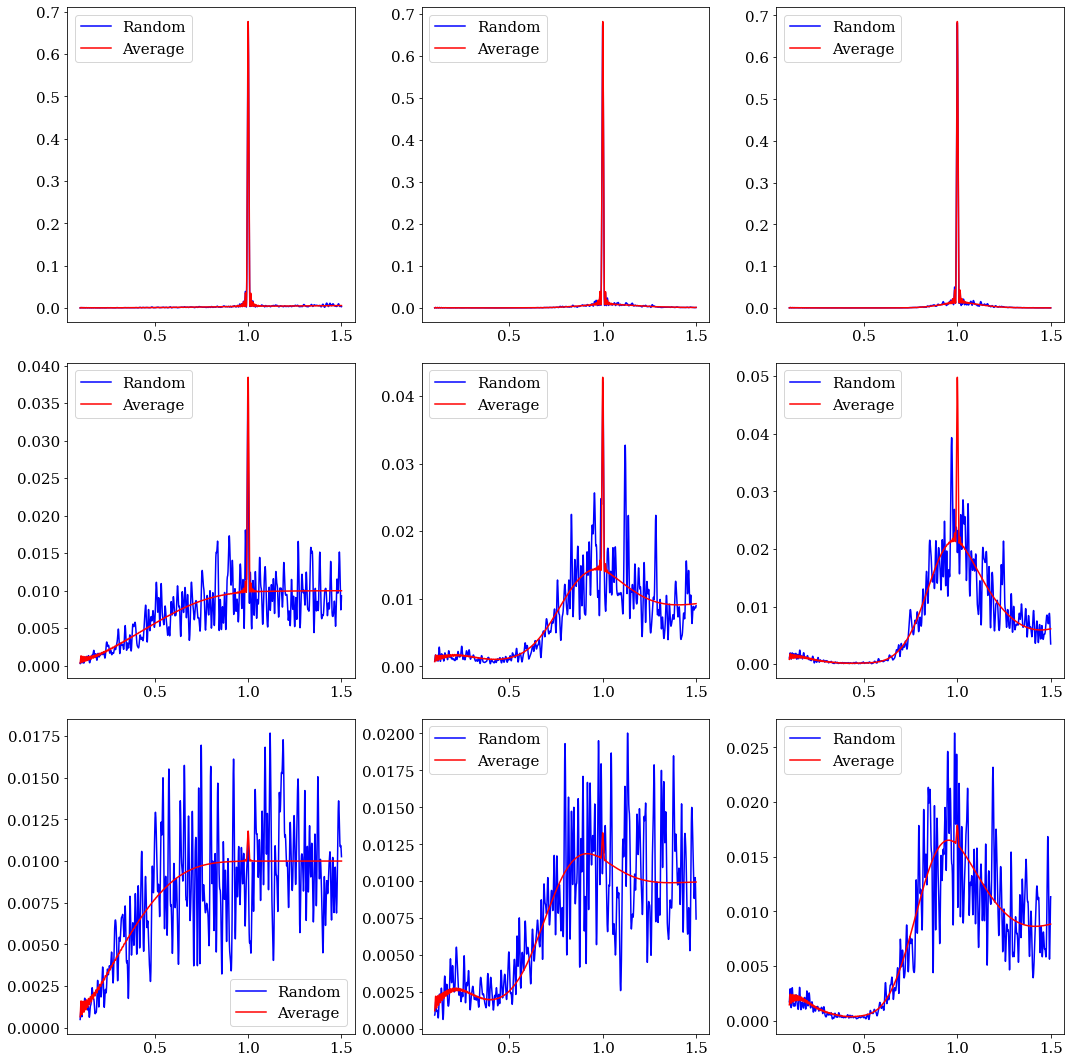

In [13]:

iplot = 0
plt.figure(figsize=(5 * len(Sds), 5 * len(Ls)))
for i, Sd in enumerate(Sds):
    print(f"Outer {i+1} / {len(Sds)}")
    for j, Lc in enumerate(Ls):
        print(f"  Inner {j+1} / {len(Ls)}")

        diff_fig = compute_diff_fig(noise_type, nb_avg, Lc, Sd, list_kx, resolution, N)

        tot_n_corr = max(int(Lc*3), 1)

        stat_diff_fig  = CorrDis.analytical_average_diff_fig(S_delta, Lc, Sd, tot_n_corr, list_kx, resolution, pos_orders, N, return_type=0)

        
        plt.subplot(len(Sds), len(Ls), iplot + 1)
        plt.plot(list_kx, diff_fig, 'b', label=f"Random")
        plt.plot(list_kx, stat_diff_fig, 'r', label=f"Average")
        plt.legend()
        iplot += 1
plt.tight_layout()

plt.show()